In [1]:

# Standard Data Science Helpers
import numpy as np
import scipy

import pandas as pd
import featuretools as ft

# Graphic libraries
import matplotlib as plt
%matplotlib inline
plt.style.use('fivethirtyeight');plt.rcParams['font.size']=18
import seaborn as sns

# Extra options
pd.options.display.max_rows = 10

In [6]:
df = pd.read_csv('data/crude_oil_prices.csv',
 parse_dates = ['Date']).set_index('Date')
df.head()

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


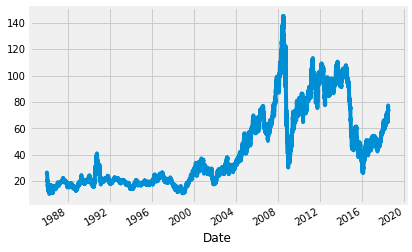

In [7]:
df['Closing Value'].plot();

In [38]:
d1 = pd.datetime(2000, 1, 1).toordinal()
d2 = pd.datetime(2015, 1, 1).toordinal()

In [39]:
df['ord'] = [x.toordinal() for x in df.index]

In [40]:
import pymc3 as pm

In [61]:
mod = pm.Model()

with mod:
    T = pm.Uniform('changepoint', d1, d2, shape = 3)    
    u = pm.HalfNormal('u', shape=4)
    grp = (df['ord'].values > T) * 1
    y_obs = pm.Normal('y_obs', mu=u[grp], observed = df['Closing Value'].values)

ValueError: Input dimension mis-match. (input[0].shape[0] = 3, input[1].shape[0] = 8223)

In [ ]:
with mod:
    step = pm.Slice()
    trace = pm.sample(step=step)

C:\Users\willk\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
C:\Users\willk\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BA7303A90>,
      dtype=object)

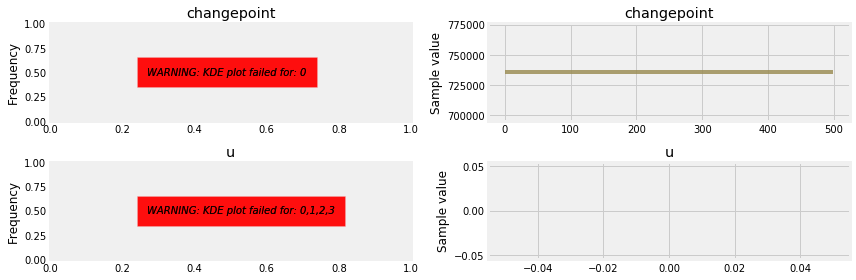

In [59]:
pm.traceplot(trace)

In [60]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
changepoint,7.355990e+05,0.0,0.0,7.355990e+05,7.355990e+05,NaN,NaN
u__0,inf,NaN,NaN,inf,inf,NaN,NaN
u__1,inf,NaN,NaN,inf,inf,NaN,NaN
u__2,inf,NaN,NaN,inf,inf,NaN,NaN
u__3,inf,NaN,NaN,inf,inf,NaN,NaN


ValueError: supplied range of [inf, inf] is not finite

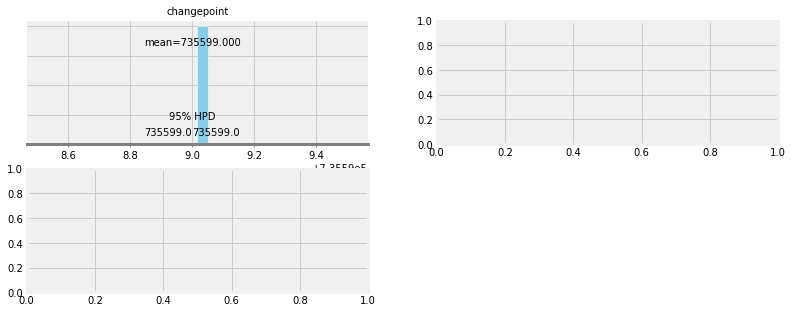

In [44]:
pm.plot_posterior(trace)

In [45]:
trace.varnames

['changepoint_interval__', 'u_log__', 'changepoint', 'u']

In [46]:
trace['changepoint'].mean()

735599.0

In [52]:
df['ord'].min(), df['ord'].max()

(725008, 736884)

In [53]:
df['ord']

Date
1986-01-02    725008
1986-01-03    725009
1986-01-06    725012
1986-01-07    725013
1986-01-08    725014
               ...  
2018-07-03    736878
2018-07-04    736879
2018-07-05    736880
2018-07-06    736881
2018-07-09    736884
Name: ord, Length: 8223, dtype: int64

In [56]:
df.loc[df['ord'] == 735598]

,Closing Value,ord
Date,,
2014-12-31,53.45,735598


In [47]:
df.loc[df['ord'] == int(trace['changepoint'].mean())]

,Closing Value,ord
Date,,
